In [144]:
# import tensorflow, keras,  matplotlib library
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [145]:
# load dataset
# reference :https://keras.io/api/datasets/
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [146]:
x_train.shape # there are 60k training data and the image is 32x32 pixel

(60000, 28, 28)

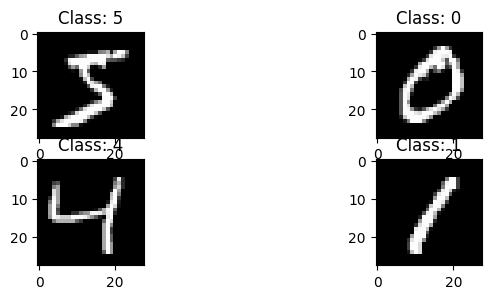

In [147]:
# plot few of the images of the numbers of the training dataset
plt.figure(figsize=(8, 8))
for i in range(4):
  plt.subplot(5, 2, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title('Class: ' + str(y_train[i]))
plt.show()


In [148]:
# create the model
# reference https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# reference https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(10, activation=tf.nn.relu),  # input shape required
        tf.keras.layers.Dense(10, activation=tf.nn.sigmoid),
        # tf.keras.layers.Dense(10)
])

In [149]:
# compile the model
# reference
# reference https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# reference https://www.tensorflow.org/api_docs/python/tf/keras/losses
# reference https://www.tensorflow.org/api_docs/python/tf/keras/metrics

model.compile(
      optimizer= 'adam',
      loss= 'SparseCategoricalCrossentropy',
      metrics= ['accuracy']
);

In [150]:
model.fit(x_train,y_train, epochs=5)
# here in the result we can see that the accuracy is not good, let's scale down the input data

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3362 - accuracy: 0.2658
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8622 - accuracy: 0.2947
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6824 - accuracy: 0.3929
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6155 - accuracy: 0.4265
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4619 - accuracy: 0.4480


In [151]:
x_train = x_train / 255
x_test = x_test / 255

In [152]:
model.fit(x_train,y_train, epochs=5) # this time is better and reached to 92%

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8747 - accuracy: 0.7142
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4236 - accuracy: 0.8786
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3449 - accuracy: 0.9001
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3103 - accuracy: 0.9103
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2895 - accuracy: 0.9163


In [153]:
# let's evaluate the model on the test data
model.evaluate(x_test,y_test) # evaluation accuracy is 92% which  is good, that means our model is not overfitted

313/313 [==============================] - 1s 2ms/step - loss: 0.2747 - accuracy: 0.9183


[0.27473798394203186, 0.9182999730110168]

In [154]:
y_train[:5] # here we show the first 5 numbers in the ground truth and we can see that at the first position it is 5

array([5, 0, 4, 1, 9], dtype=uint8)

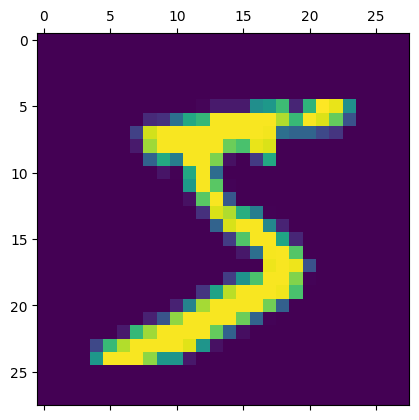

In [155]:
plt.matshow(x_train[0]) # Now, let's see what we get at the position in the input data, we got the 5

In [156]:
# now let's see how does our model predict on the test data
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [157]:
y_pred[:1]
# the output shows the value of 10 scores, in the Sequential function we had given value 10, which means that it it what that what is the probability
# to be 1 ,2 ,3, ....10 , highest the probaility value better the result

array([[2.3344479e-07, 4.7022968e-09, 1.7994311e-05, 1.3958736e-04,
        2.3720068e-09, 5.9733588e-07, 1.2921965e-12, 2.3610157e-01,
        1.3807045e-07, 8.3389656e-05]], dtype=float32)

In [158]:
np.argmax(y_pred[:1]) # wow it says that the highest probability to be 7

7

In [159]:
y_test[:1] # it is 7

array([7], dtype=uint8)

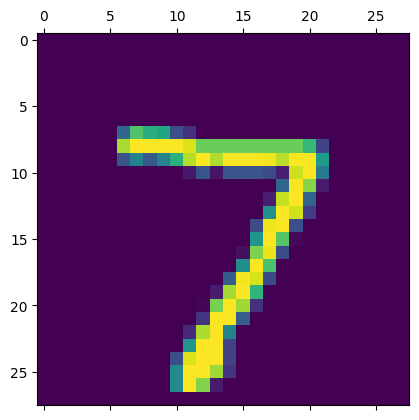

In [160]:
plt.matshow(x_test[0]) # Now, let's see what we get at the position in the input data, we got the 7

In [161]:
y_pred_lab = [np.argmax(i) for i in y_pred]

In [162]:
# y_pred_lab[0]

In [163]:
# let's ee how does it look like in the confuson matrix
# reference https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_lab)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    3,    1,    2,    6,   12,    3,    3,    0],
       [   0, 1116,    4,    3,    1,    1,    4,    2,    4,    0],
       [   8,    7,  920,   27,   11,    1,   11,   10,   27,   10],
       [   1,    1,   21,  927,    1,   22,    1,   13,   17,    6],
       [   1,    2,    2,    0,  918,    0,    7,    6,    2,   44],
       [   9,    4,    3,   54,   18,  745,   12,   13,   25,    9],
       [   9,    3,    6,    1,   14,   14,  906,    4,    1,    0],
       [   0,    7,   22,    7,    6,    1,    1,  959,    0,   25],
       [   4,   12,    7,   31,   16,   27,   11,   12,  834,   20],
       [   8,    6,    1,   12,   44,    7,    0,   22,    1,  908]],
      dtype=int32)>

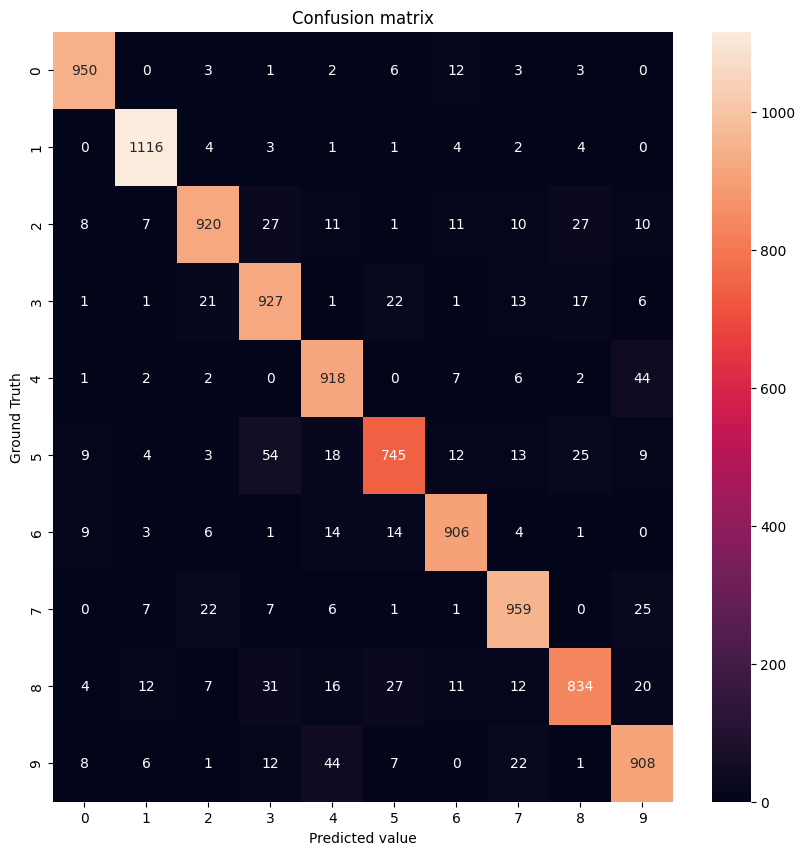

In [166]:
# confusion matrix plot
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)  # fmt='g' gives green color
ax.set_xlabel('Predicted value')
ax.set_ylabel('Ground Truth')
ax.set_title('Confusion matrix')
plt.show()
# here we can see that model has predicted 954 time 0 and the ground truth is also 0. However,
#there are 10 ocasion when ground truth was 2 and the predicted value was 0
# So, the conclusion is, any values which does not fall in the diagonal is the error